In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
today=date.today().strftime('%Y-%m-%d')
print(f"Todays Date: {today}")
btc=yf.download("BTC-USD", start='2024-10-01', end=today)
btc=btc[['Open', 'High', 'Low', 'Close', 'Volume']]
btc['Target']=btc['Close'].shift(-1)
btc.dropna(inplace=True)

Todays Date: 2025-08-13


C:\Users\Varun\AppData\Local\Temp\ipykernel_18000\3075333064.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc=yf.download("BTC-USD", start='2024-10-01', end=today)
[*********************100%***********************]  1 of 1 completed


In [3]:
X=btc[['Open', 'High', 'Low', 'Close', 'Volume']]
Y=btc['Target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=LinearRegression()
model.fit(X_train_scaled,Y_train)
Y_pred=model.predict(X_test_scaled)
r2score=r2_score(Y_test,Y_pred) 
mse=mean_squared_error(Y_test,Y_pred) 
tom=X.iloc[-1].values.reshape(1,-1)
tom_scaled=scaler.transform(tom)
tom_Closing_price=model.predict(tom_scaled)

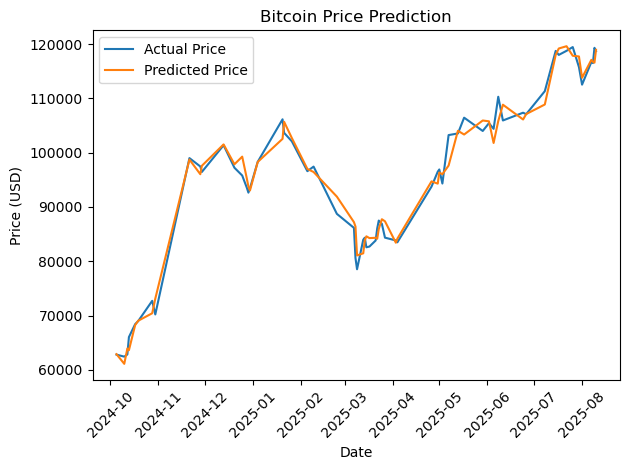

In [4]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
results = results.sort_index()
results.to_csv('bitcoin_price_predictions.csv',index=True)
plt.plot(results.index, results['Actual'], label="Actual Price")
plt.plot(results.index, results['Predicted'], label="Predicted Price")
plt.legend()
plt.title("Bitcoin Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
